In [1]:
# Uncomment when importing from GitHub
# !git clone https://www.github.com/simoneroncallo/classifier-decision-boundary.git
# %cd /content/classifier-decision-boundary
# !mkdir ./output/data

# Uncomment when importing from Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/'Colab Notebooks'/classifier-decision-boundary

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/classifier-decision-boundary


In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from functions import shallow_network, boundary

In [3]:
# Settings
size = 14
plt.rcParams.update({'font.size': size})
plt.rcParams["font.family"] = "serif"
markers = ['None', 'None', 'None', 'None', '>', 'v','<']
lines = ['-','--','-','-.']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',\
          'tab:purple','tab:brown']
mSize = 1.5 # Markersize
lWidth = 1.0 # Linewidth

# Dataset

In [4]:
# Settings
numSamples = 60000
rng = np.random.default_rng(seed = 2025)
func = lambda x: (np.sin(9*x) + np.cos(10*x**2))/2 # Generator

In [5]:
# Generation
Xusrt = np.array([rng.uniform(-1,1,size=numSamples),\
              rng.uniform(-1,1,size=numSamples)]).T # Samples
sortIdx = np.argsort(Xusrt[:,0]) # Sorted
X = Xusrt[sortIdx]
Y = np.where(func(X[:,0])<=X[:,1],1,0) # Labels
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, train_size = 0.65,\
                                              random_state = 2025)
print('Dataset size is', Xtrain.shape, Xval.shape)

Dataset size is (39000, 2) (21000, 2)


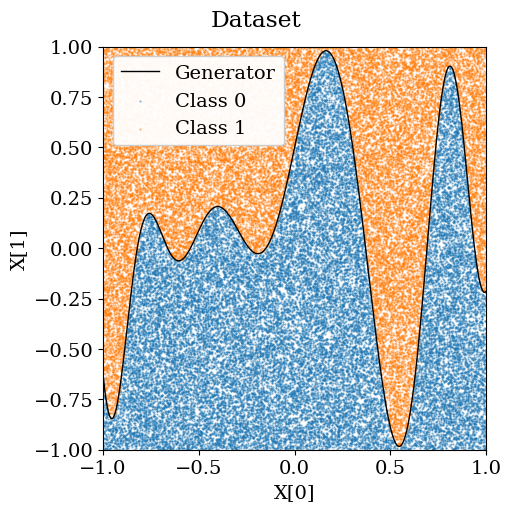

In [6]:
# Visualization
fig, ax1 = plt.subplots(1,1, figsize=(5, 5), dpi = 100,\
                               constrained_layout = True)

ax1.plot(X[:,0], func(X[:,0]), linestyle = lines[0],\
                 color = 'black', marker = markers[0],\
                     markersize = mSize, linewidth = lWidth,\
                         label = 'Generator')
for idx in range(2):
  ax1.scatter(X[Y == idx, 0], X[Y == idx, 1], color = colors[idx],\
              marker = '.', label=f"Class {idx}", alpha=0.5, s=mSize)

ax1.set_xlim(-1,1), ax1.set_ylim(-1,1)
ax1.set_xlabel('X[0]'), ax1.set_ylabel('X[1]')
ax1.legend(framealpha = .95, loc='upper left')
plt.suptitle('Dataset')
plt.show()

# Boundary

In [7]:
hiddenNeurons = np.array([0,2,4,8,16,64,256,1024,4096,16384]) # Cases
outImgs = []
for idx, numHiddenNeurons in enumerate(hiddenNeurons):
  dataset = (Xtrain, Xval, Ytrain, Yval)
  model, history = shallow_network(numHiddenNeurons, func,\
                                   dataset, numEpochs = 150)
  outImgs.append(boundary(X, model, func, numHiddenNeurons))
outImgs[0].save("output/animatedOutput.gif", save_all = True,\
                append_images=outImgs[1:], duration = 600, loop = 1) # Save GIF


Training...
Testing...
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step

Training...
Testing...
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step

Training...
Testing...
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step

Training...
Testing...
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step

Training...
Testing...
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step

Training...
Testing...
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step

Training...
Testing...
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step

Training...
Testing...
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step

Training...
Testing...
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step

Training...
Testing...
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step
